**Import Library**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

##Import Dataset using load_digits

In [ ]:
dataset = load_digits()

**Check the dataset, image, and target**

In [ ]:
dataset

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

**Visualize all the number in dataset**

<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

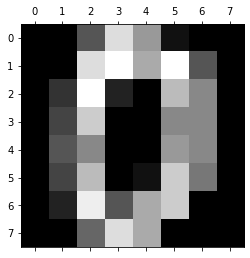

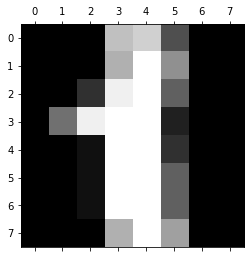

In [ ]:
pl.gray()
for i in range (2): #I use 2 loops so that the output is not long
  pl.matshow(dataset.images[i])
pl.show

##Collect 2 Class with number 1 and 4

In [ ]:
DataPart = []
DataPart_target = []

**Using " .append" to insert the data and target to the class. And convert to array because there's a matrix multiplication**

In [ ]:
for i in range (len(dataset.images)):
  if dataset.target[i] == 1 or dataset.target[i] == 4: #Take 2 class, number 1 and number 4
    DataPart.append(dataset.data[i])
    DataPart_target.append(dataset.target[i])

DataPart = np.array(DataPart)
DataPart_target = np.array(DataPart_target)

In [ ]:
print(DataPart.shape)

(363, 64)


## Pre-Processing

Using MinMaxScaler for pre-processing target

In [ ]:
DataPart = DataPart.reshape((len(DataPart),-1))
DataPart_target = DataPart_target.reshape(DataPart_target.shape[0],-1)

DataPart_target = MinMaxScaler().fit_transform(DataPart_target)

**Initialize random Weight and bias, number of epoch and learning_rate**

In [ ]:
weight = np.random.normal(size = (64, 1))
bias = np.random.normal(size = 1)
epoch = 3000
learning_rate = 0.01

##Split data with 80% train size and 20% test size

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(DataPart, DataPart_target, test_size=0.2)

##Activation function with hardlim

In [ ]:
def feed_forward(inputs):
    value = np.matmul(inputs, weight)
    value += bias
    return activation_function(value) 

def activation_function(x):
    if x >= 0:
        return 1
    else:
        return 0

##Computing the activation function for the neural network and predict the accuracy

In [ ]:
y_pred = []
for i in range(1, epoch):
    randIndex = np.random.randint(0, len(x_train))
    data_training = x_train[randIndex]

    output_training = feed_forward(data_training)
    error = y_train[randIndex] - output_training

    #Update Weight
    weight = np.add(weight, np.array(data_training).reshape(64, 1) * learning_rate * error)

    #Update Bias
    bias = bias + (learning_rate * error)

    #Test the Data
    if i % 500 == 0:
        corretct_pixel = 0
        for j , inp in enumerate(x_train):
            output_testing = feed_forward(inp)
            if output_testing == y_train[j]:
                corretct_pixel += 1
            
        print(f'[Epoch: {i}] ')
        print(f'Accuracy: {corretct_pixel/len(x_train)*100}% -- Correct_Pixel: {corretct_pixel}')

[Epoch: 500] 
Accuracy: 97.58620689655172% -- Correct_Pixel: 283
[Epoch: 1000] 
Accuracy: 98.9655172413793% -- Correct_Pixel: 287
[Epoch: 1500] 
Accuracy: 98.9655172413793% -- Correct_Pixel: 287
[Epoch: 2000] 
Accuracy: 100.0% -- Correct_Pixel: 290
[Epoch: 2500] 
Accuracy: 100.0% -- Correct_Pixel: 290


Predicted data

In [ ]:
predic = []
for i in range(0, len(x_test)):
  pred = feed_forward(x_test[i])
  predic.append(pred)

##Classification report

Classification report is used to perform fixed accuracy, precision, recall, and f1-score 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        37
         1.0       0.97      1.00      0.99        36

    accuracy                           0.99        73
   macro avg       0.99      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



##Confusion Matrix

In [ ]:
confusionMatrix = metrics.confusion_matrix(y_test, predic)
print("Confusion matrix:\n{}".format(confusionMatrix))

Confusion matrix:
[[36  1]
 [ 0 36]]


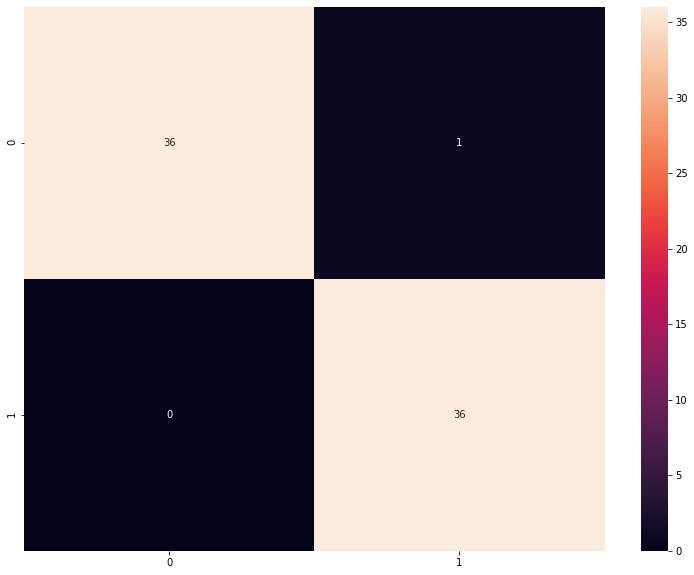

In [ ]:
df_cm = pd.DataFrame(confusionMatrix, range(2), range(2))
plt.figure(figsize=(13,10))
sn.heatmap(df_cm, annot=True)
plt.show()